# **Logistic Regresion**

```scikit-learn``` webpage [here](https://scikit-learn.org/stable/index.html) \
```Iris``` dataset description [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) \
```Iris``` info [here](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) \
```LogisticRegression``` documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)

### In Synthetic data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_samples = 250 , n_features = 2 , n_redundant = 0, n_informative = 2, n_clusters_per_class = 1, n_classes = 2, random_state = 3)
## n_samples= # muestras,n_features= # caracteristicas (color y tamaño), n_clases=# de clases (manzanas y uvas),
## random_state=semilla aleatoria --> función aleatoria depende de una constante, en lenguajes de programación se usa la fecha y hora del sistema para tomar la constante (se usan 2 valores de tiempo)

print(X.shape, y.shape)

(250, 2) (250,)


In [ ]:
df1 = pd.DataFrame(data=X)
df1['2']= y
df1

,0,1,2
0,0.562013,0.326504,0
1,0.503001,-1.175246,1
2,1.072417,-0.991239,1
3,0.225363,0.759364,0
4,0.132537,1.600935,0
...,...,...,...
245,0.307479,0.805540,0
246,1.876899,-0.696056,1
247,2.584884,1.703774,0
248,1.595420,-0.929273,1


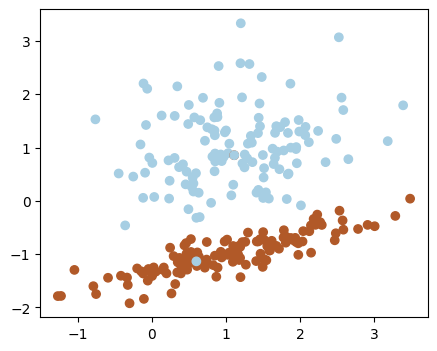

In [ ]:
_, ax = plt.subplots(figsize=( 5 , 4 )) ##(ancho y alto)
ax.scatter( X[:,0] , X[:,1] , c = y , cmap = 'Paired') ##scatter=dispersión

In [ ]:
# Create an instance
##Estamos buscando valores de pendiente e intercepto "entrenamiento del modelo"
logistic_regression = LogisticRegression()

# Train the model
logistic_regression.fit ( X , y ) #(# Samples, # Features), este el vector de datos

LogisticRegression()

In [ ]:
##Imprimo la pendiente y el intercepto de la recta
print(logistic_regression.coef_,logistic_regression.intercept_)

[[ 1.11248354 -4.14427505]] [-2.11317384]


y = coef_[0] * X[:,0] + coef_[1] * X[1] + intercept_

$y = coef[0]× X[:,0] + coef[1] × X[:,1] + intercept$





### **Decision boundaries**
Estamos buscando el rectangulo que describe el área ocupada por puntos

In [ ]:
# Min-Max values for the grid of decision boundaries
h_min, h_max = X[:,0].min() - 0.1 , X[:,0].max() + 0.1 #busco el val mínimo del valor del eje horizontal de los datos , el "0.1", es un offset como para no pegarme tanto a los datos
v_min, v_max = X[:,1].min() - 0.1 , X[:,1].max() + 0.1 #aq

# Create grid
h_grid, v_grid = np.meshgrid( np.linspace(h_min, h_max, 500) , np.linspace(v_min, v_max, 500) ) #Esta función genera 2 matrices, la primera con la componente horizontal del grid (la x del punto) y la segunda matriz con la componente vertical (la y del punto) del grid
## np.linspace(valmin, valmax, cantidad de puntos), Arreglo que describe una linea con ptos equidistantes

print(h_grid.shape,v_grid.shape,h_grid.ravel().shape,v_grid.ravel().shape)
print(np.c_[h_grid.ravel(),v_grid.ravel()].shape)
## .ravel() toma los valores de una matriz(2D) y los pasa a un listado (arreglo,1D) "chorizo"
#np.c concatena dos array 1D, para convertilos en un array con 2 columnas en donde voy a tener los valores de las coordenadas horizontal y vertical

# Estimate predictions over the grid
predictions = logistic_regression.predict(np.c_[h_grid.ravel(), v_grid.ravel()])
print (predictions.shape)

# Reshape predictions
predictions = predictions.reshape(h_grid.shape) #se vuelve a poner las predicciones en el formato de la cuadrícula para poder graficarlo
print (predictions.shape)

(500, 500) (500, 500) (250000,) (250000,)
(250000, 2)
(250000,)
(500, 500)


[]

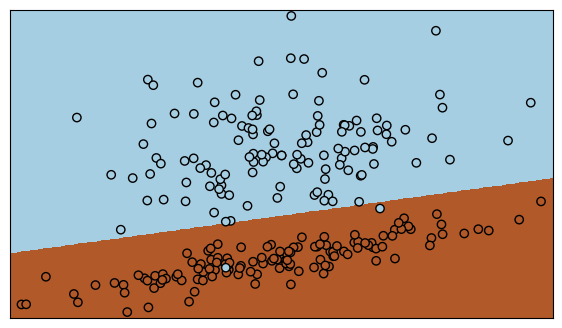

In [ ]:
# Draw grid
_, ax = plt.subplots (figsize=(7,4))
ax.pcolormesh( h_grid , v_grid , predictions , cmap = "Paired")
##Esto está pintando el color de fondo del gráfico

# Scatter real values
ax.scatter ( X[:,0] , X[:,1] , c = y , edgecolors = 'k', cmap = "Paired")
##edgecolor= borde de los puntos es de color 'k' (negro)

ax.set_xticks(())
ax.set_yticks(())

### In Real data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris() ##Cargo los datos

In [ ]:
# iris = load_iris() # Load iris dataset
iris_x = iris.data[:,0:2] # Features, solo 2 caracteristicas
iris_y = iris.target # Labels, es una sola columa y no es necesario especificar
## caracteristicas = 4 (ancho y largo de petalo y cepalo)
## clases = 3 tipos de flores
## son 50 flores por clase = 150 total

# Imprimir formas
print(iris_x.shape, iris_y.shape)

(150, 2) (150,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


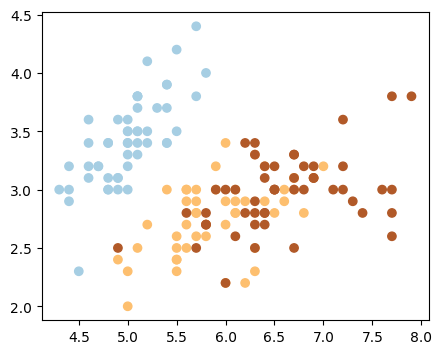

In [ ]:
##Esto es solo para poder visualizar los datos y entender
df = pd.DataFrame(data=iris.data,columns=iris.feature_names) ##creo el df
df['species'] = iris.target ##agrego la columna con las eqtiquetas al df
display(df)

_, ax = plt.subplots(figsize=( 5 , 4 )) ##(ancho y alto)
ax.scatter( iris_x[:,0] , iris_x[:,1] , c = iris_y , cmap = 'Paired') ##scatter=dispersión
## c = define de qué color se pinta cada punto para que se muestren las clases
## cmap = ya es la paleta de colores

In [ ]:
# Create an instance
logistic_regression = LogisticRegression()

# Train the model
logistic_regression.fit(iris_x ,iris_y) #(# Samples, # Features)

LogisticRegression()

In [ ]:
# Min-Max values for the grid of decision boundaries
h_min, h_max = iris_x[:,0].min()-0.1 , iris_x[:,0].max()+0.1
v_min, v_max = iris_x[:,1].min()-0.1 , iris_x[:,1].max()+0.1

# Create the grids
x_grid, y_grid = np.meshgrid(np.linspace(h_min,h_max,500) , np.linspace(v_min,v_max,500))

# Estimate predictions over the grid
predictions = logistic_regression.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
print (predictions.shape)

(250000,)


[]

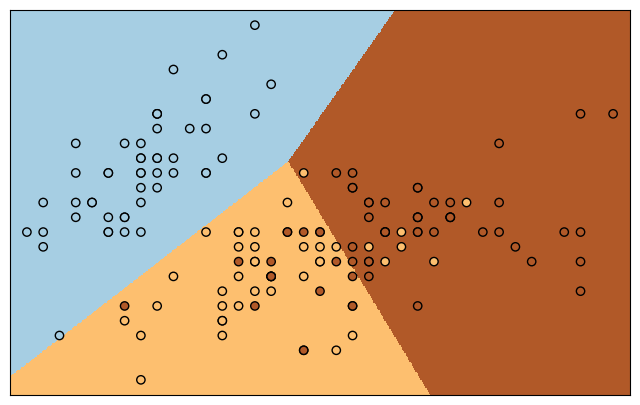

In [ ]:
# Reshape predictions
predictions = predictions.reshape(500,500)

# Draw grid
_, ax = plt.subplots (figsize=(8,5))
ax.pcolormesh( x_grid , y_grid , predictions , cmap = "Paired")

# Scatter real values
ax.scatter ( iris_x[:,0] , iris_x[:,1] , c = iris_y , edgecolors = 'k', cmap = "Paired")

ax.set_xticks(())
ax.set_yticks(())